In [155]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
# Importing the dataset
df = pd.read_csv('online.csv')

In [157]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [158]:
df.shape

(50, 5)

In [159]:
df.isnull().sum()

,0
Marketing Spend,0
Administration,0
Transport,0
Area,0
Profit,0


In [160]:
# if missiong
# missing = df.Administration.mean()
# df.Administration = df.Administration.fillna(missing)

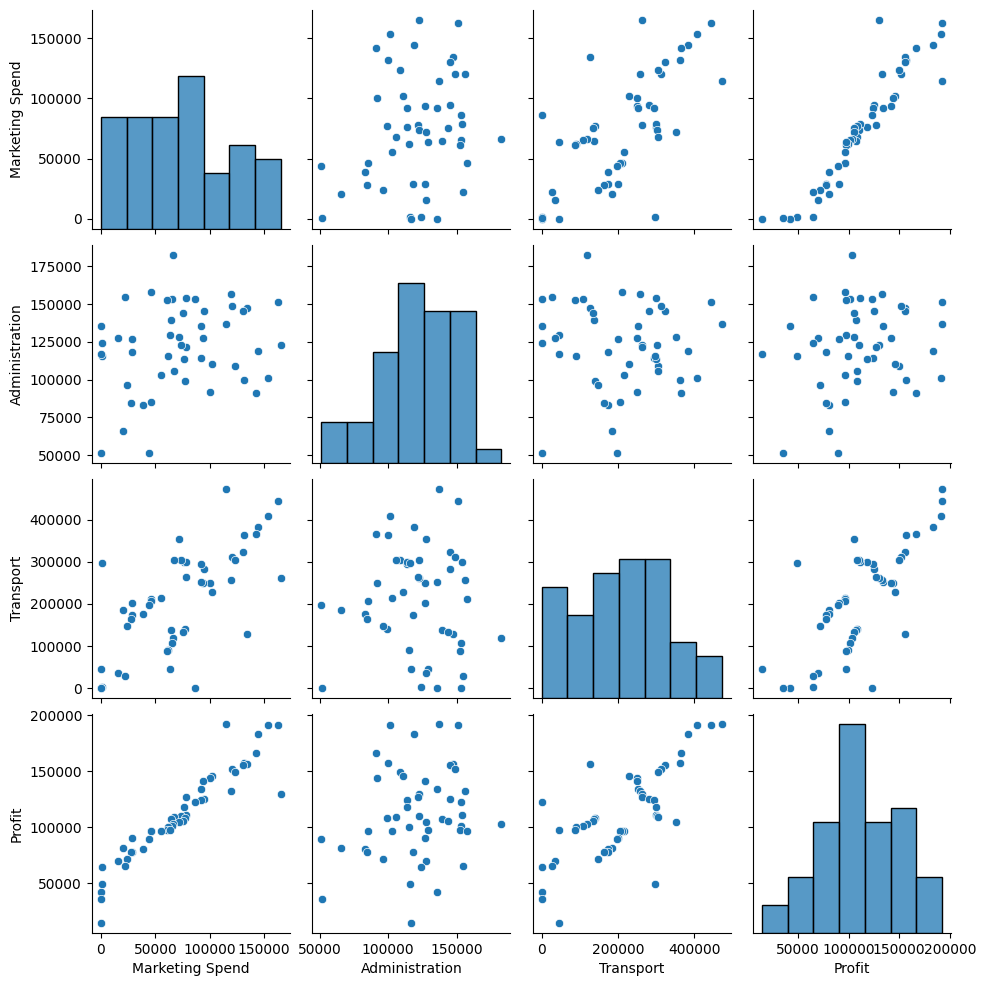

In [161]:
import seaborn as sns

sns.pairplot(df)

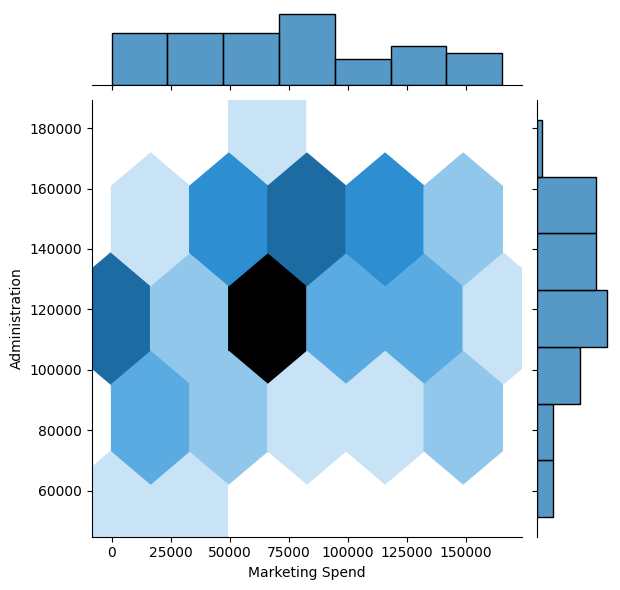

In [162]:
sns.jointplot(x="Marketing Spend",y="Administration",data=df,kind="hex")

# separate x,y

In [163]:
x = df.drop(['Profit'],axis=1)

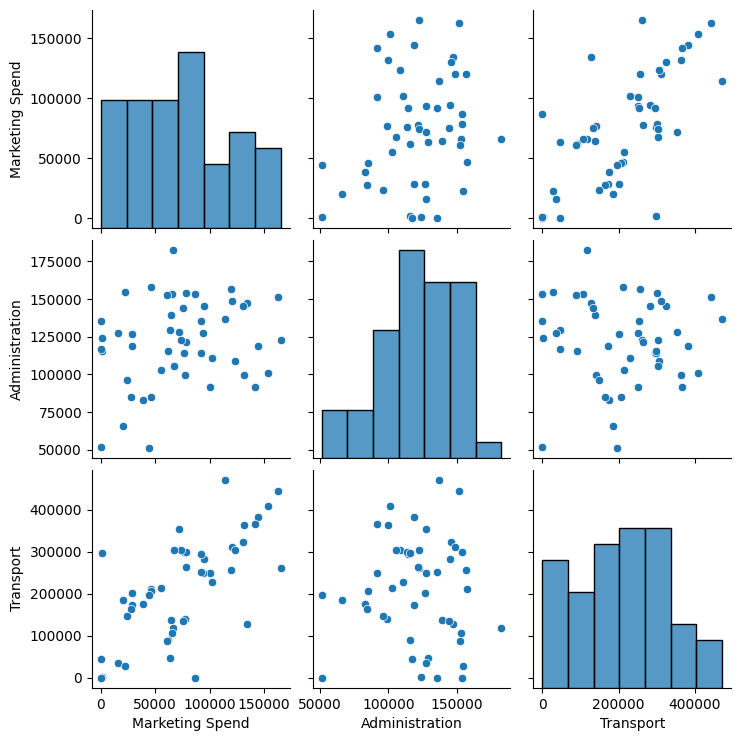

In [164]:
sns.pairplot(x)

In [165]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [166]:
y = df['Profit']

In [167]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# One hot encoding

In [168]:
#Convert the column into categorical columns
# city = pd.get_dummies(x["Area"],prefix="encoded",dtype=int)
city = pd.get_dummies(x['Area'],drop_first=True)

In [169]:
city.head(5)

,Dhaka,Rangpur
0,True,False
1,False,False
2,False,True
3,True,False
4,False,True


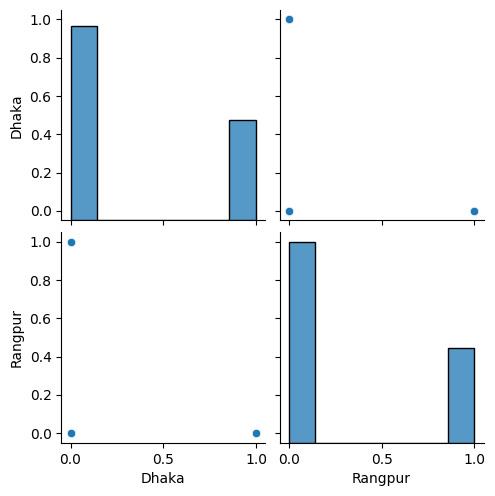

In [170]:
sns.pairplot(city)

In [171]:
# Drop the Area coulmn
x = x.drop('Area',axis=1)

In [172]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [173]:
#concatation
x = pd.concat([x,city],axis=1)

In [174]:
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,True,False
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,False,True
3,144372.41,118671.85,383199.62,True,False
4,142107.34,91391.77,366168.42,False,True


In [175]:
# Splitting the dataset into the Training set and Test set

In [176]:
#import library
from sklearn.model_selection import train_test_split


In [294]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [295]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression


In [296]:
regressor = LinearRegression()

In [297]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [298]:
xtest.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
37,44069.95,51283.14,197029.42,False,False
23,67532.53,105751.03,304768.73,False,True
44,22177.74,154806.14,28334.72,False,False
42,23640.93,96189.63,148001.11,False,False
47,0.00,135426.92,0.00,False,False


In [299]:
ytest.head()

,Profit
37,89949.14
23,108733.99
44,65200.33
42,71498.49
47,42559.73


In [300]:
# Predicting the Test set results
pred = regressor.predict(xtest)

In [301]:
pred

array([ 87866.35786863, 112456.3339687 ,  67468.41005755,  73726.27760772,
        49805.30059586, 120099.66969208, 170237.51494376,  93599.64928747,
       156986.7423115 , 147262.33819421,  84593.8931095 , 175520.38527471,
        80248.1658245 ])

In [302]:
regressor.score(xtest,ytest)

0.9765752698121555

# R-Squared Value

In [303]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [304]:
score=r2_score(ytest,pred)

In [305]:
score

0.9765752698121555

In [306]:
# mean_squared_error(ytest,pred)